In [ ]:
pip install tensorflow_hub

In [ ]:
pip install tensorflow_text

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

<h4>Import the dataset (Dataset is taken from kaggle)</h4>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/spam.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [ ]:
747/4825

0.15481865284974095

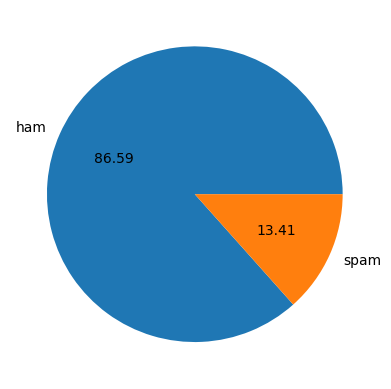

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['Message'].apply(len)

In [ ]:
df.head()

,Category,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Category,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.826992,2.004666
std,59.926946,13.853616,1.539516
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham
df[df['Category'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.425699,1.846010
std,58.434864,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam
df[df['Category'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.029451
std,29.980287,7.036282,1.552198
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

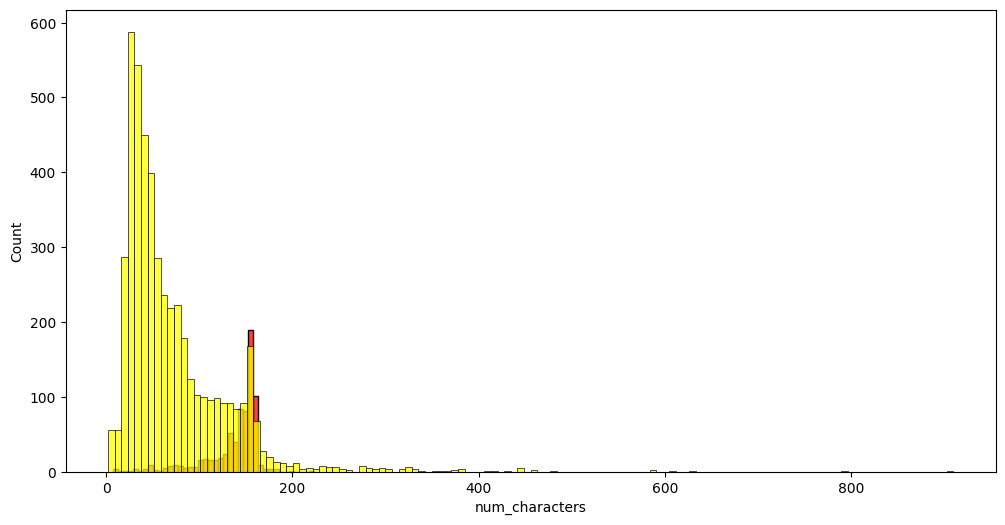

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 'spam']['num_characters'],color = 'red')
sns.histplot(df[df['Category'] == 'ham']['num_characters'],color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

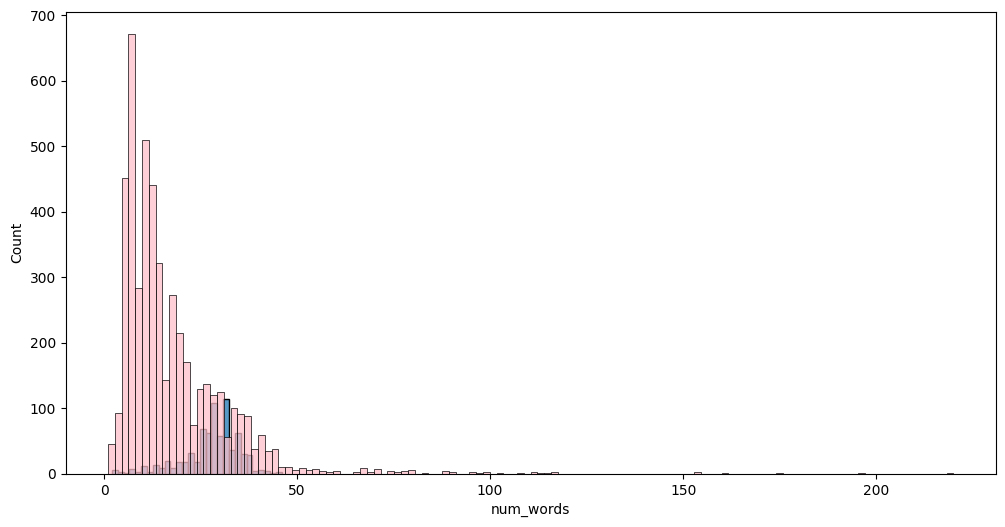

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 'spam']['num_words'])
sns.histplot(df[df['Category'] == 'ham']['num_words'],color='pink')

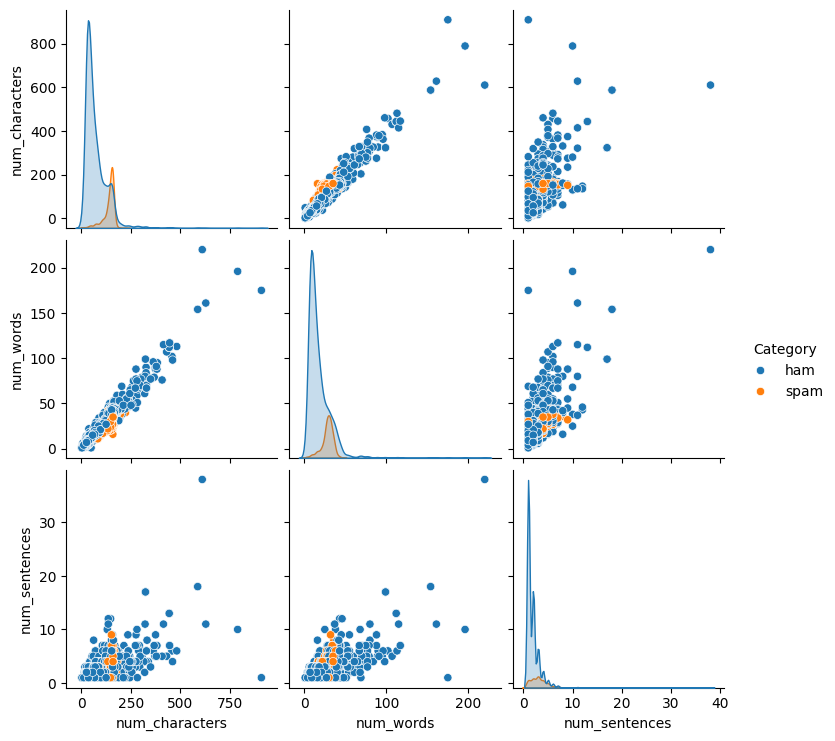

In [ ]:
sns.pairplot(df,hue='Category')

In [ ]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'ham'

##Data preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
import string
def transform_Message(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)

    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in Message:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
transform_Message("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"i 'm gon na be home soon and i do n't want to talk about thi stuff anymor tonight , k ? i 've cri enough today ."

In [ ]:
df['transformed_Message'] = df['Message'].apply(transform_Message)

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point , crazi .. avail onli in..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor ... u c alreadi then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i do n't think he goe to usf , he live aro..."


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
ham_wc = wc.generate(df[df['Category'] == 'ham']['transformed_Message'].str.cat(sep=" "))

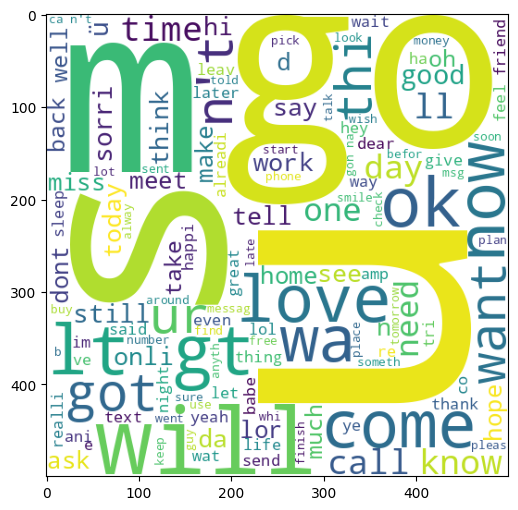

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_wc = wc.generate(df[df['Category'] == 'spam']['transformed_Message'].str.cat(sep=" "))

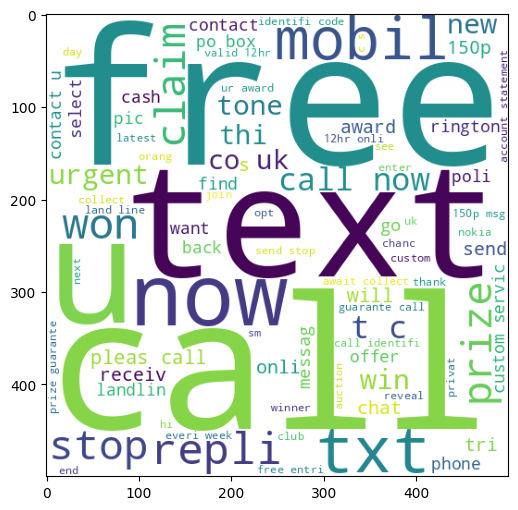

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point , crazi .. avail onli in..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor ... u c alreadi then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i do n't think he goe to usf , he live aro..."


In [ ]:
spam_corpus = []
for msg in df[df['Category'] == 'spam']['transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

20733

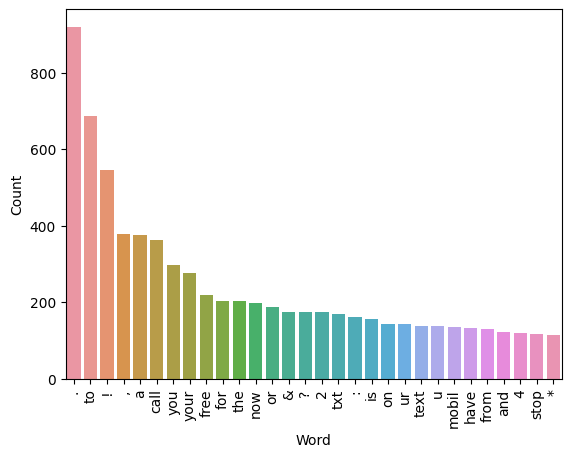

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list of values you want to plot

# Count the occurrences of each item in spam_corpus
word_counts = Counter(spam_corpus)

# Convert the Counter object to a DataFrame and select the most common 30 items
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=["Word", "Count"])

# Create the barplot using the DataFrame
sns.barplot(x="Word", y="Count", data=word_counts_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['Category'] == 'ham']['transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

83978

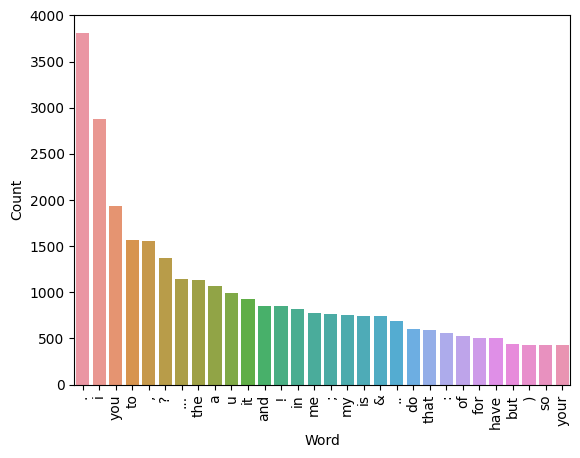

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of values you want to plot

# Count the occurrences of each item in ham_corpus
word_counts = Counter(ham_corpus)

# Convert the Counter object to a DataFrame and select the most common 30 items
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=["Word", "Count"])

# Create the barplot using the DataFrame
sns.barplot(x="Word", y="Count", data=word_counts_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point , crazi .. avail onli in..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor ... u c alreadi then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i do n't think he goe to usf , he live aro..."


**15% spam emails, 85% ham emails: This indicates class imbalance**

In [ ]:
df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 6)

In [ ]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 6)

##From here

In [ ]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 6)

In [ ]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(1494, 6)

In [ ]:
df_balanced['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [ ]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,Category,Message,num_characters,num_words,num_sentences,transformed_Message,spam
3141,spam,sexy sexy cum and text me im wet and warm and ...,144,35,3,sexi sexi cum and text me im wet and warm and ...,1
1475,ham,"Friendship is not a game to play, It is not a ...",141,35,1,"friendship is not a game to play , it is not a...",0
2992,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,122,25,1,hot live fantasi call now 08707509020 just 20p...,1
4142,ham,Beautiful truth : Expression of the face could...,153,32,2,beauti truth : express of the face could be se...,0
188,spam,Please call our customer service representativ...,147,25,1,pleas call our custom servic repres on freepho...,1


<h4>Split it into training and test data set</h4>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [ ]:
X_train.head(4)

3673    came to look at the flat, seems ok, in his 50s...
3141    sexy sexy cum and text me im wet and warm and ...
147     FreeMsg Why haven't you replied to my text? I'...
937       Since when, which side, any fever, any vomitin.
Name: Message, dtype: object

<h4>Now lets import BERT model and get embeding vectors for few sample statements</h4>

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435168 , -0.5132724 , -0.8884571 , ..., -0.7474884 ,
        -0.7531473 ,  0.91964483],
       [-0.87208354, -0.50543964, -0.94446665, ..., -0.85847497,
        -0.7174535 ,  0.88082975]], dtype=float32)>

<h4>Build Model</h4>

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [ ]:
len(X_train)

1120

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

<h4>Train the model</h4>

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


Epoch 1/30
35/35 [==============================] - 686s 20s/step - loss: 0.4474 - accuracy: 0.8518 - precision: 0.8373 - recall: 0.8732 - val_loss: 0.3977 - val_accuracy: 0.8957 - val_precision: 0.8737 - val_recall: 0.9251
Epoch 2/30
35/35 [==============================] - 682s 20s/step - loss: 0.4010 - accuracy: 0.8768 - precision: 0.8676 - recall: 0.8893 - val_loss: 0.3575 - val_accuracy: 0.8930 - val_precision: 0.8657 - val_recall: 0.9305
Epoch 3/30
35/35 [==============================] - 681s 20s/step - loss: 0.3641 - accuracy: 0.8839 - precision: 0.8669 - recall: 0.9071 - val_loss: 0.3278 - val_accuracy: 0.9011 - val_precision: 0.8827 - val_recall: 0.9251
Epoch 4/30
35/35 [==============================] - 681s 20s/step - loss: 0.3430 - accuracy: 0.8929 - precision: 0.8780 - recall: 0.9125 - val_loss: 0.3064 - val_accuracy: 0.9011 - val_precision: 0.8788 - val_recall: 0.9305
Epoch 5/30
35/35 [==============================] - 682s 20s/step - loss: 0.3261 - accuracy: 0.8911 - pr

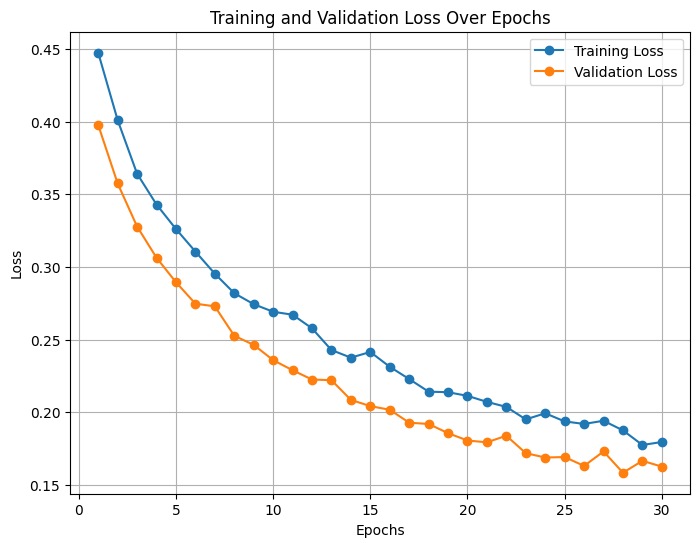

In [ ]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.grid(True)
plt.show()


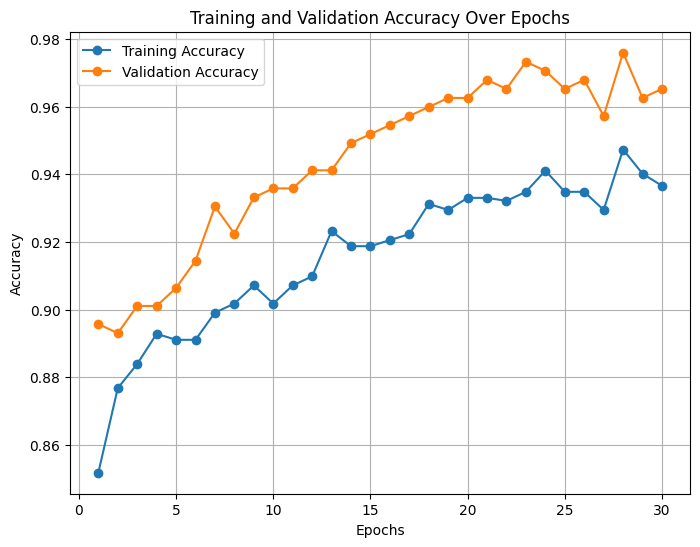

In [ ]:
import matplotlib.pyplot as plt

# Access training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.grid(True)
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 163s 14s/step - loss: 0.1627 - accuracy: 0.9652 - precision: 0.9728 - recall: 0.9572


[0.162655770778656, 0.9652406573295593, 0.9728260636329651, 0.9572192430496216]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 163s 13s/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[182,   5],
       [  8, 179]])

Text(50.722222222222214, 0.5, 'Truth')

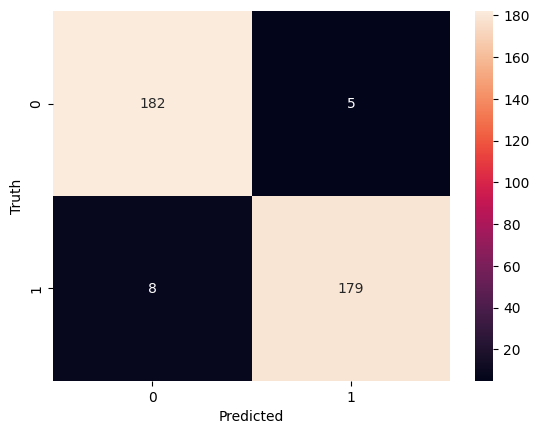

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

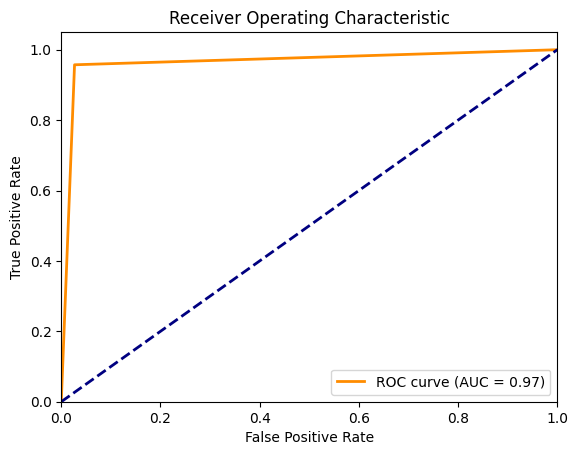

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       187
           1       0.97      0.96      0.96       187

    accuracy                           0.97       374
   macro avg       0.97      0.97      0.97       374
weighted avg       0.97      0.97      0.97       374



<h4>Inference</h4>

In [ ]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 2s 2s/step


array([[0.81503934],
       [0.9167884 ],
       [0.7502632 ],
       [0.08377394],
       [0.02516889]], dtype=float32)